# Outliers Notebook

The main challenge with removing outliers is that there is always some ambiguity on whether or not a specific data point is actually an outlier. For this notebook, we will define an outlier as a data point that falls under one of these 3 categories:
1. Data point violates constraints defined by domain knowledge of dataset
2. Data point is visually separated from other points on a graph
3. Data point fails a statistical test or rule


The problem of outliers is that they affect the mean of the data and lead to bigger losses when training. Therefore, they create bias in our estimates. In this notebook, we are going to look at different methods of dealing with outliers other than OMP. Outliers are a prevalent issue as they occur very commonly across datasets due to issues such as mislabeling of measurements, data corruption and even natural cases such as VIP tickets for events.

## Importing of Libraries and Dataset <br>

Below we are importing the libraries and providing the helper functions to compare models. We are using the sklearn boston dataset in this assignment. The score_dataset helper function is credited to https://www.kaggle.com/dansbecker/handling-missing-values.

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

boston_target = boston.target
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


In [71]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Now, let us check if there is any obvious data point that violates the domain knowledge of the dataset. __Do any of the min/max of the columns violate the constraints given in the description of the dataset?__<br>
## Student solution here ##
No, none of the variables violate the constraints given.

## Visualize Data
One common way of noticing outliers is by graphs and visualizing data. On graphs it is easier to note that points are very far apart allowing us to detect ouliers.

### Box Plots
A box plot with iqr ranges is a simple way of noticing points with some statistical reference. The next task involves making a box plot of the variable LSTAT in the dataset. __Comment on the plot.__<br>
## Student solution here ##
There are a few points out of the range but most of them are within the IQR range.

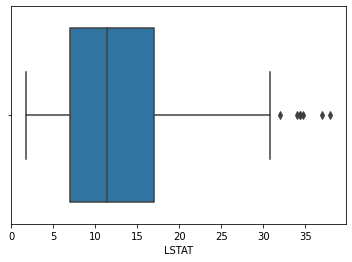

In [75]:
# Begin Solution
%matplotlib inline
sns.boxplot(x=boston_df['LSTAT'])
# End Solution

### Scatter Plots

A scatter plot of 2 different variables can see outliers that satisfy multiple criteria in addition to showing how a relationship may make a datapoint an outlier. For example an inverse relationship with most points but a certain point has a high value for both of the variables. For this exercise, make a plot between the variables NOX and INDUS and add the best fit line. __Comment on the plot and the best fit line.__ <br>
## Student solution here ##
Most of the variables are clumped up together suggesting that those values are usually within a range but there is one variable with high values for both this makes the best fit line move towards that point and therefore making the plot look different.

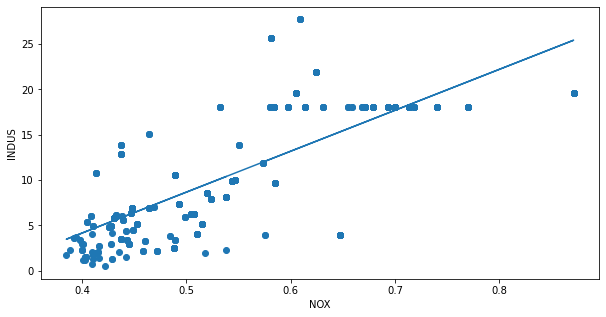

In [83]:
# Begin Solution
fig, line = plt.subplots(figsize=(10,5))
line.scatter(boston_df['NOX'], boston_df['INDUS'])
line.set_xlabel('NOX')
line.set_ylabel('INDUS')
m, b = np.polyfit(boston_df['NOX'], boston_df['INDUS'], 1)
plt.plot(boston_df['NOX'], m*boston_df['NOX'] + b)
plt.show()
# End Solution

## Z-Score 
The Z-Score is a statistical metric that determines how far away a point is from the mean. In this case it gives the distance of each point from the mean of the column. For the next task, determine the z values of X_train. <br>
_Hint : Use the stats library from scipy_

In [68]:
# Begin Solution
z = np.abs(stats.zscore(boston_df))
# End Solution
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Even with this table it is hard to see which points are outliers but we can determine a threshold for choosing outliers. For the purpose of this notebook, the threshold is going to be 3. __Implement a method to remove the outliers from X_train using z. Remember to modify the size of z due to adding the target back into the dataset before removing the rows that have large z values.__

In [70]:
z_comb = boston_df.copy(deep = True)
z_comb['target'] = boston_target
# Begin Solution
holder = np.ones(boston_target.shape[0]).reshape(boston_target.shape[0], 1)
z = np.hstack((z, holder))
z_removed_data = z_comb[(z < 3).all(axis=1)]
# End Solution
print(z_removed_data.shape)
z_y_train = z_removed_data['target']
z_x_train = z_removed_data.drop(columns = ['target'])

(415, 14)


Although we are not using the target it is important to know how to extract the target and effectively remove the points in the target that correspond to outliers. <br>__How many points were deleted by this outlier removal?__ <br>
## Student solution here ##
506 - 415 = 91 points

## IQR

The IQR is defined as the distance between the first and the third quantile. We can then apply the IQR rule to filter out the small and the big points. For the next task, we are going to look at performing IQR on the dataset. __Calculate the IQR of the dataset__

In [87]:
# Begin Solution
q1 = boston_df.quantile(.25)
q3 = boston_df.quantile(.75)
IQR = q3 - q1
# End Solution
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


__Remove the values out of the IQR rule. Comment on the remaining data points. How does this compare to z score removal?__ <br>
## Student solution here ##
This removal takes more points that z score with a threshold of 3. We have removed a large portion of the dataset but the remaining points are more clustered and easier to use.

In [88]:
boston_df_iqr = boston_df.copy(deep = True)
#Begin Solution
boston_df_iqr = boston_df_iqr[~((boston_df_iqr < (q1 - 1.5 * IQR)) |(boston_df_iqr > (q3 + 1.5 * IQR))).any(axis=1)]
# End Solution

boston_df_iqr.shape

(274, 13)

Credits to https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers